In [70]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [71]:
apple_stock = yf.download("AAPL", start="2022-01-01", end="2023-01-01")

[*********************100%%**********************]  1 of 1 completed


In [72]:
apple_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190979,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904053,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171860,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.281006,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449341,86709100


In [73]:
apple_stock["Daily_Return"]= apple_stock["Adj Close"].pct_change()
apple_stock.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return
Date,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190979,104487900,NaN
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904053,99310400,-0.012692
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171860,94537600,-0.026600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.281006,96904000,-0.016694
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449341,86709100,0.000989


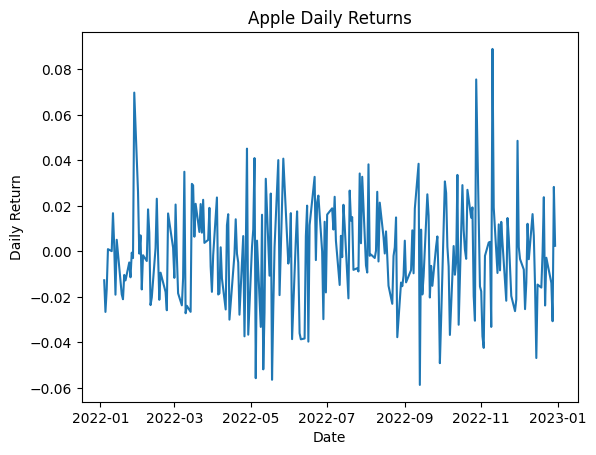

In [74]:
plt.plot(apple_stock["Daily_Return"])
plt.title("Apple Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.show()

In [75]:
apple_stock["50_MA"] = apple_stock["Adj Close"].rolling(window=50).mean()
apple_stock.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,50_MA
Date,,,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900,-0.002798,143.446967
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477600,69007800,-0.013878,143.285240
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400,-0.030685,142.963928
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.059387,75703700,0.028324,142.687070
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.378006,77034200,0.002469,142.414399


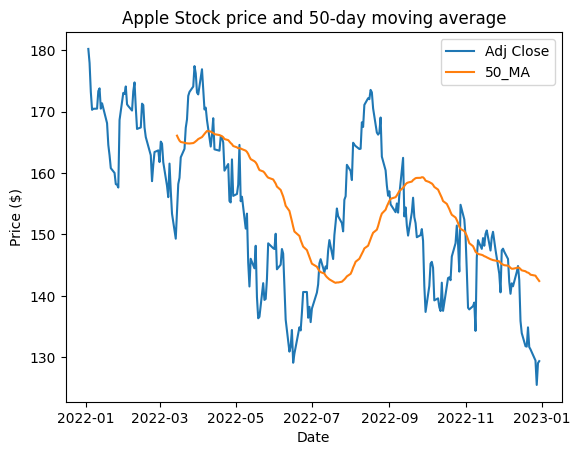

In [76]:
plt.plot(apple_stock["Adj Close"], label ="Adj Close")
plt.plot(apple_stock["50_MA"], label ="50_MA")
plt.title("Apple Stock price and 50-day moving average")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()


In [77]:
volatility = apple_stock["Daily_Return"].std()
print(f"Volatility:{volatility}")

Volatility:0.0224712989675174


In [78]:
risk_free_rate = 0.01
annual_return = (apple_stock["Daily_Return"].mean()+1)**252 -1  #252 taken as weekdays only
annual_volatility = apple_stock["Daily_Return"].std()*np.sqrt(252)
sharpe_ratio = (annual_return-risk_free_rate)/annual_volatility
print(f"Sharpe ratio :  {sharpe_ratio}" )

Sharpe ratio :  -0.6927824022344339


In [79]:
sp500 = yf.download("^GSPC", start = "2022-01-01", end ="2023-01-01")


[*********************100%%**********************]  1 of 1 completed


In [80]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000


In [81]:
sp500["Daily_Return_SP500"] = sp500["Adj Close"].pct_change()
sp500

,Open,High,Low,Close,Adj Close,Volume,Daily_Return_SP500
Date,,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000,NaN
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000,-0.000630
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000,-0.019393
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000,-0.000964
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000,-0.004050
...,...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000,0.005868
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000,-0.004050
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000,-0.012021


In [82]:
joined_data = pd.concat([apple_stock["Daily_Return"],sp500["Daily_Return_SP500"]], axis=1).dropna()

In [83]:
joined_data.head()

,Daily_Return,Daily_Return_SP500
Date,,
2022-01-04,-0.012692,-0.000630
2022-01-05,-0.026600,-0.019393
2022-01-06,-0.016694,-0.000964
2022-01-07,0.000989,-0.004050
2022-01-10,0.000116,-0.001441


In [84]:
beta = joined_data.cov().iloc[0,1] / joined_data["Daily_Return_SP500"].var()

In [85]:
print(f"Beta : {beta}")

Beta : 1.3057987467584071


In [86]:
apple_stock["20_MA"] = apple_stock["Adj Close"].rolling(window = 20).mean()

In [87]:
apple_stock["Upper_band"] = apple_stock["20_MA"] +2 * apple_stock["Adj Close"].rolling(window= 20).std()

In [88]:
apple_stock.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,50_MA,20_MA,Upper_band
Date,,,,,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900,-0.002798,143.446967,140.063426,151.599916
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477600,69007800,-0.013878,143.285240,139.356941,151.683195
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400,-0.030685,142.963928,138.603655,152.374460
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.059387,75703700,0.028324,142.687070,137.686569,151.433481
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.378006,77034200,0.002469,142.414399,136.771473,150.149069


In [89]:
apple_stock["Lower_band"] = apple_stock["20_MA"] - 2 * apple_stock["Adj Close"].rolling(window = 20).std()

In [90]:
apple_stock.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,50_MA,20_MA,Upper_band,Lower_band
Date,,,,,,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900,-0.002798,143.446967,140.063426,151.599916,128.526937
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477600,69007800,-0.013878,143.285240,139.356941,151.683195,127.030687
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400,-0.030685,142.963928,138.603655,152.374460,124.832850
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.059387,75703700,0.028324,142.687070,137.686569,151.433481,123.939657
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.378006,77034200,0.002469,142.414399,136.771473,150.149069,123.393876


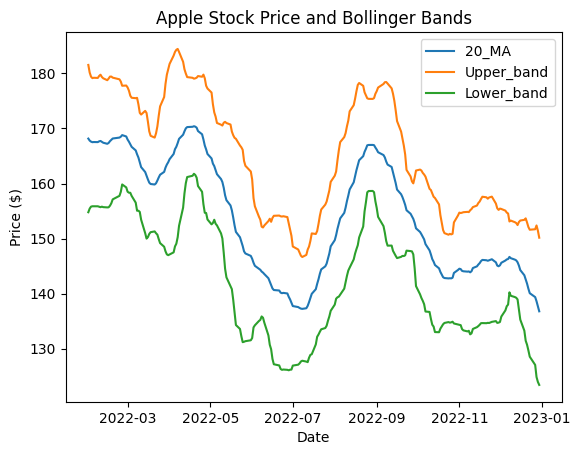

In [93]:
#plt.plot(apple_stock["Adj Close"], label = "Adj Close")
plt.plot(apple_stock["20_MA"], label = "20_MA")
plt.plot(apple_stock["Upper_band"], label = "Upper_band")
plt.plot(apple_stock["Lower_band"], label = "Lower_band")
plt.title("Apple Stock Price and Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()


In [94]:
delta = apple_stock["Adj Close"].diff(1)
gain = (delta.where(delta>0,0)).rolling(window=14).mean()
loss = (-delta.where(delta <0,0)).rolling(window=14).mean()

In [95]:
rs= gain/loss

In [96]:
apple_stock["RSI"] = 100 -(100/(1+rs))

In [97]:
apple_stock.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,50_MA,20_MA,Upper_band,Lower_band,RSI
Date,,,,,,,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900,-0.002798,143.446967,140.063426,151.599916,128.526937,26.261612
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477600,69007800,-0.013878,143.285240,139.356941,151.683195,127.030687,27.960277
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400,-0.030685,142.963928,138.603655,152.374460,124.832850,26.152328
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.059387,75703700,0.028324,142.687070,137.686569,151.433481,123.939657,30.302126
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.378006,77034200,0.002469,142.414399,136.771473,150.149069,123.393876,31.430270


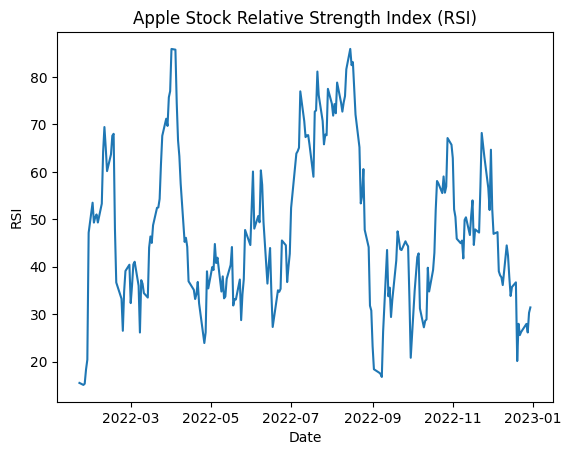

In [98]:
plt.plot(apple_stock["RSI"])
plt.title("Apple Stock Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.show()